## Movie Genere Classification

In [42]:
#Importing Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk.corpus
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
train_df = pd.read_csv('train_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
train_df.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [45]:
test_df = pd.read_csv('test_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Description'])
test_df.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
5,Er nu zhai (1955),Before he was known internationally as a marti...


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [47]:
# This Dataset has only Categorical column, the summary statistics will be count, unique, top, frequency
train_df.describe(include='object')

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy o...
freq,1,13613,12


In [48]:
train_df['Genre'].value_counts()
#train_data['Title'].value_counts()
#train_data['Description'].value_counts()

Genre
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

In [49]:
train_df.shape

(54214, 3)

In [50]:
train_df.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

<Axes: xlabel='Genre'>

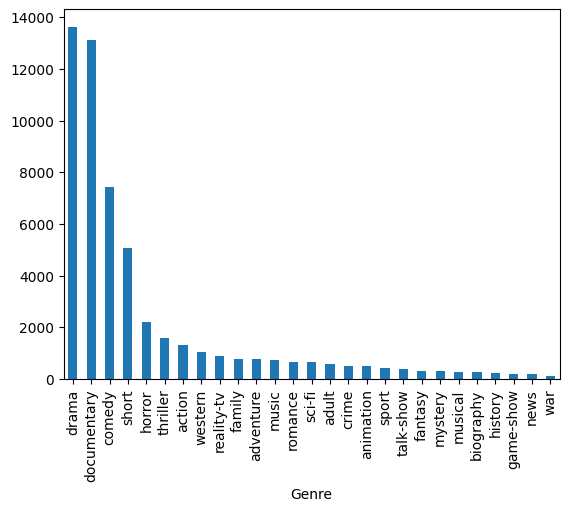

In [51]:
#Visualize the Data
# Check the Genre Category counts
train_df['Genre'].value_counts().plot(kind='bar')

In [52]:
#plt.scatter(train_df['Title'],train_df.Genre)
#plt.show()

E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 2000x1000 with 0 Axes>

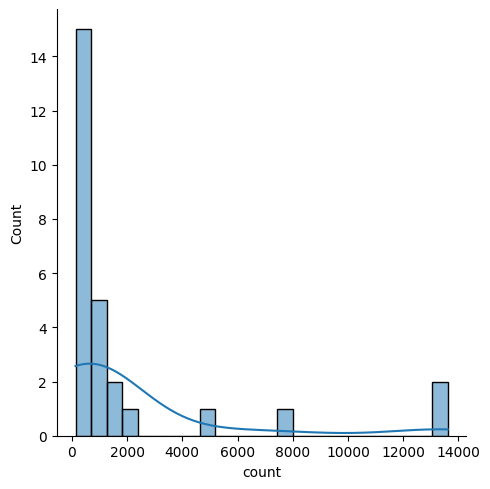

In [53]:
fig = plt.figure(figsize=(20,10))
Genre = train_df['Genre'].value_counts().to_frame()
sns.displot(x=Genre['count'],data=Genre,kde=True)

In [54]:
mean = Genre.mean()
std_dev = Genre.std()
median = Genre.median()

In [55]:
from scipy.stats import norm
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
pdf = norm.pdf(x, mean, std_dev)
#pdf = norm.pdf(Genre['count'],mean,std)
pdf

array([[1.21764715e-06],
       [1.45776154e-06],
       [1.73882675e-06],
       [2.06647870e-06],
       [2.44686693e-06],
       [2.88665288e-06],
       [3.39299774e-06],
       [3.97353802e-06],
       [4.63634740e-06],
       [5.38988331e-06],
       [6.24291686e-06],
       [7.20444508e-06],
       [8.28358464e-06],
       [9.48944664e-06],
       [1.08309926e-05],
       [1.23168718e-05],
       [1.39552423e-05],
       [1.57535755e-05],
       [1.77184484e-05],
       [1.98553266e-05],
       [2.21683401e-05],
       [2.46600591e-05],
       [2.73312720e-05],
       [3.01807739e-05],
       [3.32051689e-05],
       [3.63986949e-05],
       [3.97530747e-05],
       [4.32574020e-05],
       [4.68980663e-05],
       [5.06587227e-05],
       [5.45203116e-05],
       [5.84611318e-05],
       [6.24569689e-05],
       [6.64812817e-05],
       [7.05054452e-05],
       [7.44990492e-05],
       [7.84302493e-05],
       [8.22661659e-05],
       [8.59733230e-05],
       [8.95181225e-05],


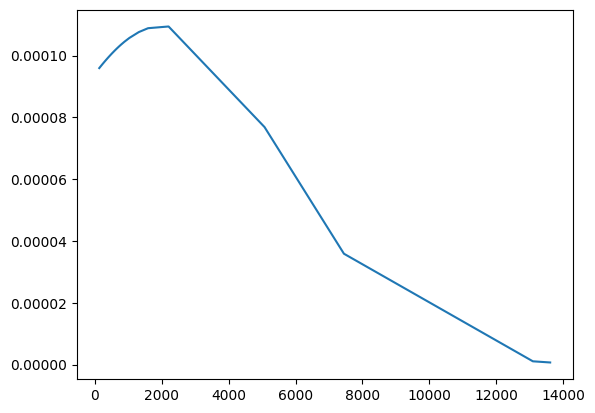

In [56]:
# plotting the Distribution
plt.plot(Genre['count'], norm.pdf(Genre['count'],mean,std_dev),label='μ: {}, σ: {}'.format(str(mean),str(std_dev)))

(array([3.35140336e-05, 0.00000000e+00, 1.67570168e-05, 1.67570168e-05,
        1.67570168e-05, 3.35140336e-05, 0.00000000e+00, 6.70280672e-05,
        6.70280672e-05, 5.02710504e-05, 6.70280672e-05, 8.37850840e-05,
        1.34056134e-04, 8.37850840e-05, 1.00542101e-04, 5.02710504e-05,
        1.50813151e-04, 2.34598235e-04, 1.00542101e-04, 3.35140336e-05,
        1.17299118e-04, 1.67570168e-05, 3.35140336e-05, 5.02710504e-05,
        1.67570168e-05, 1.67570168e-05, 0.00000000e+00, 1.67570168e-05,
        3.35140336e-05, 3.35140336e-05]),
 array([-7675.10929522, -7078.34436254, -6481.57942987, -5884.81449719,
        -5288.04956451, -4691.28463183, -4094.51969915, -3497.75476647,
        -2900.9898338 , -2304.22490112, -1707.45996844, -1110.69503576,
         -513.93010308,    82.83482959,   679.59976227,  1276.36469495,
         1873.12962763,  2469.89456031,  3066.65949298,  3663.42442566,
         4260.18935834,  4856.95429102,  5453.7192237 ,  6050.48415638,
         6647.24908905

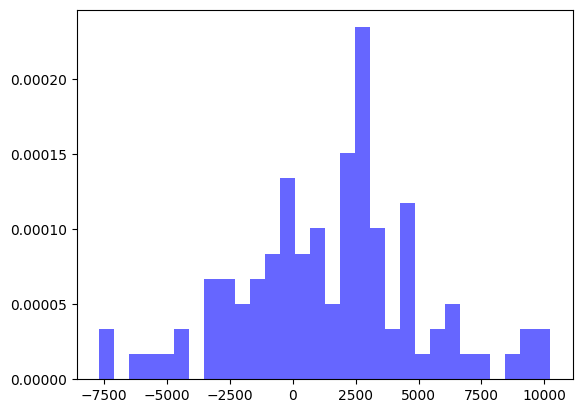

In [57]:
# Generate random data from a normal distribution
size = 100
data = norm.rvs(loc=mean, scale=std_dev , size = size)

# Create a histogram of the data to visualize the distribution
plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

<a id="3"></a> <br>
## Data Cleansing and Prepping

In [58]:
# Changing Descritpion column to lowercase, to clean and normalize all the text
train_df['Description'] = train_df['Description'].str.lower().copy()

In [59]:
train_df_clean = train_df.copy()
type(train_df_clean['Description'][1])

str

In [60]:
# Find any at sign(@) is used and followed by any word
def atSignRem(x):
    x = re.sub('[@,<,?,&,*,#,%,]+\w+', '',x)
    return x
train_df_clean['Description'] = train_df_clean['Description'].apply(atSignRem)
train_df_clean.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the film's title refers not only to the un-rec...


In [61]:
def remLinks(x):
    x = re.sub(r'http\S+', '', x)
    return x
train_df_clean['Description'] = train_df_clean['Description'].apply(remLinks)
train_df_clean.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the film's title refers not only to the un-rec...


In [62]:
def charAlone(x):
    x = re.sub(r"[^a-zA-Z+']", ' ', x)
    return x
train_df_clean['Description'] = train_df_clean['Description'].apply(charAlone)
train_df_clean.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the film's title refers not only to the un rec...


In [63]:
string.punctuation
def avoidPunct(x):
    x = "".join([i for i in x if i not in string.punctuation])
    return x
train_df_clean['Description'] = train_df_clean['Description'].apply(avoidPunct)
train_df_clean.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his doc...
2,Cupid (1997),thriller,a brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,to help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,the films title refers not only to the un reco...


In [64]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [65]:
# Now preparing the Dataset for model Training
import nltk
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens
train_df_clean['Description'] = train_df_clean['Description'].apply(lambda x : tokenize(x))
train_df_clean

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,"[listening, in, to, a, conversation, between, ..."
2,Cupid (1997),thriller,"[a, brother, and, sister, with, a, past, inces..."
3,"Young, Wild and Wonderful (1980)",adult,"[as, the, bus, empties, the, students, for, th..."
4,The Secret Sin (1915),drama,"[to, help, their, unemployed, father, make, en..."
5,The Unrecovered (2007),drama,"[the, films, title, refers, not, only, to, the..."
...,...,...,...
54210,"""Bonino"" (1953)",comedy,"[this, short, lived, nbc, live, sitcom, center..."
54211,Dead Girls Don't Cry (????),horror,"[the, next, generation, of, exploitation, the,..."
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"[ze, bestaan, echt, is, a, stand, up, comedy, ..."
54213,Make Your Own Bed (1944),comedy,"[walter, and, vivian, live, in, the, country, ..."


In [66]:
# Removing Stop Words
stopwords = nltk.corpus.stopwords.words("english")
print(len(stopwords))
print(stopwords)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [67]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text
train_df_clean['Description'] = train_df_clean['Description'].apply(lambda x : remove_stopwords(x))
train_df_clean.tail()

,Title,Genre,Description
54210,"""Bonino"" (1953)",comedy,"[short, lived, nbc, live, sitcom, centered, bo..."
54211,Dead Girls Don't Cry (????),horror,"[next, generation, exploitation, sisters, kapa..."
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"[ze, bestaan, echt, stand, comedy, growing, fa..."
54213,Make Your Own Bed (1944),comedy,"[walter, vivian, live, country, difficult, tim..."
54214,Nature's Fury: Storm of the Century (2006),history,"[labor, day, weekend, intense, hurricane, ever..."


<a id="4"></a> <br>
## Word Lemmetizing and Vectorizing

In [68]:
le = nltk.WordNetLemmatizer()

In [69]:
def lemmatizing(tokenized_text):
    text = [le.lemmatize(word) for word in tokenized_text]
    text=' '.join(text)
    return text
train_df_clean['lemmetized_description'] = train_df_clean['Description'].apply(lambda x : lemmatizing(x))
train_df_clean.iloc[:10,:]

,Title,Genre,Description,lemmetized_description
1,Oscar et la dame rose (2009),drama,"[listening, conversation, doctor, parents, yea...",listening conversation doctor parent year old ...
2,Cupid (1997),thriller,"[brother, sister, past, incestuous, relationsh...",brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,"[bus, empties, students, field, trip, museum, ...",bus empty student field trip museum natural hi...
4,The Secret Sin (1915),drama,"[help, unemployed, father, make, ends, meet, e...",help unemployed father make end meet edith twi...
5,The Unrecovered (2007),drama,"[films, title, refers, un, recovered, bodies, ...",film title refers un recovered body ground zer...
6,Quality Control (2011),documentary,"[quality, control, consists, series, mm, singl...",quality control consists series mm single take...
7,"""Pink Slip"" (2009)",comedy,"[tough, economic, times, max, joey, run, ideas...",tough economic time max joey run idea discover...
8,One Step Away (1985),crime,"[ron, petrie, keanu, reeves, troubled, teen, w...",ron petrie keanu reef troubled teen whose life...
9,"""Desperate Hours"" (2016)",reality-tv,"[sudden, calamitous, event, causing, great, lo...",sudden calamitous event causing great loss lif...
10,Spirits (2014/I),horror,"[four, high, school, students, embark, terrify...",four high school student embark terrifying jou...


In [70]:

vect =TfidfVectorizer()
vect

TfidfVectorizer()

In [71]:
X_tfidf =vect.fit_transform(train_df_clean['lemmetized_description'])
X_tfidf

<54214x113791 sparse matrix of type '<class 'numpy.float64'>'
	with 2621164 stored elements in Compressed Sparse Row format>

In [72]:
# If we Check the Columns, now its been vectorized with n number of columns
X_tfidf.shape

(54214, 113791)

### Training and Testing dataset creation

In [73]:
# Naive Bayes Classifier
y_df = train_df_clean['Genre']
y_df

1              drama
2           thriller
3              adult
4              drama
5              drama
            ...     
54210         comedy
54211         horror
54212    documentary
54213         comedy
54214        history
Name: Genre, Length: 54214, dtype: object

In [74]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X_tfidf,y_df,test_size=0.3,random_state=2)

In [75]:
print("Training data size = ",Xtrain.shape,ytrain.shape)
Xtrain

Training data size =  (37949, 113791) (37949,)


<37949x113791 sparse matrix of type '<class 'numpy.float64'>'
	with 1835662 stored elements in Compressed Sparse Row format>

In [76]:
print("Testing data size = ",Xtest.shape,ytest.shape)
Xtest

Testing data size =  (16265, 113791) (16265,)


<16265x113791 sparse matrix of type '<class 'numpy.float64'>'
	with 785502 stored elements in Compressed Sparse Row format>

### Training or Building model

In [77]:
classifier = MultinomialNB()

In [78]:
classifier.fit(Xtrain,ytrain)

MultinomialNB()

## Prediciting the Train Data and Test Data

In [79]:
predictions_train =  classifier.predict(Xtrain)
predictions_test = classifier.predict(Xtest)
predictions_test

array(['drama', 'drama', 'drama', ..., 'drama', 'drama', 'documentary'],
      dtype='<U11')

In [80]:
accuracyScore1 = accuracy_score(ytrain,predictions_train)
print("Training data accuracyc: ",accuracyScore1)

accuracyScore2 = accuracy_score(ytest,predictions_test)
print("Testing data accuracyc: ",accuracyScore2)

Training data accuracyc:  0.4657039711191336
Testing data accuracyc:  0.43578235474946203


## Logistic Regression Classifier

In [82]:
lmodel = LogisticRegression()

In [83]:
lmodel.fit(Xtrain, ytrain)

E:\Python setup\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<a id="9"></a> <br>
## Prediciting the Train Data and Test Data

In [86]:
pred_train2 = lmodel.predict(Xtrain)
pred_test2 = lmodel.predict(Xtest)
accuracy1 = accuracy_score(ytrain,pred_train2)
accuracy2 = accuracy_score(ytest,pred_test2)

print("Training data accuracy = ",accuracy1)
print("Testing data accuracy = ",accuracy2)

Training data accuracy =  0.7087933805897388
Testing data accuracy =  0.5762065785428835


In [91]:
# For Out Samples Method accuracy is 
print("Evaluation for training data")
Evaluation = pd.DataFrame({'Naive Bayes Model': [accuracyScore1],
                           'Logistic Regression Model':[accuracy1]}, index=['Accuracy'])
Evaluation

Evaluation for training data


,Naive Bayes Model,Logistic Regression Model
Accuracy,0.465704,0.708793


In [93]:
# For Out Samples Method accuracy is 
print("Evaluation for testing data")
Evaluation1 = pd.DataFrame({'Naive Bayes Model': [accuracyScore2],
                           'Logistic Regression Model':[accuracy2]}, index=['Accuracy'])
Evaluation1

Evaluation for testing data


,Naive Bayes Model,Logistic Regression Model
Accuracy,0.435782,0.576207
